# ChatGPT Twitter Sentiment Analysis

### About Dataset

######Dataset Name: ChatGPT Twitter Sentiment Analysis

Source: Kaggle (https://www.kaggle.com/datasets/charunisa/chatgpt-sentiment-analysis)

Description: The dataset contains a collection of tweets related to ChatGPT, a language model developed by OpenAI. Each tweet is labeled with its sentiment (neutral, good, bad).

Aim:

The aim of the project is to analyze the sentiment of tweets regarding ChatGPT on Twitter. The goal is to build a machine learning model that can accurately classify the sentiment of a tweet as neutral, good, bad.

Methodology:

Data Collection: The "Chatgpt Twitter Sentiment Analysis" dataset was obtained from Kaggle, which contains a large number of tweets along with their sentiment labels.

Data Preprocessing:The dataset underwent preprocessing steps such as removing unnecessary symbols, special characters, and URLs. Text cleaning techniques were applied to remove noise and ensure uniformity in the text data.

 Feature Extraction: Use techniques like TF-IDF (Term Frequency-Inverse Document Frequency) to convert the text data into numerical features that can be used by the machine learning models.

 Model Selection and Training: Apply machine learning algorithms like Logistic Regression and Naive Bayes to train models on the preprocessed and feature-extracted data.

 Model Evaluation: The performance of the trained models was evaluated using various metrics such as accuracy, precision, recall, and F1-score. These metrics provide insights into the model's ability to correctly classify tweets based on their sentiment.





##We are importing necessary libraries

Importing nessary libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
from wordcloud import WordCloud
from nltk import FreqDist
from nltk.tokenize import word_tokenize
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
#Load the data
df = pd.read_csv("/content/chatgpt twitter sentiment analysis.csv")

In [ ]:
#checking first five rows
df.head()

,Unnamed,tweets,labels
0,0,ChatGPT: Optimizing Language Models for Dialog...,neutral
1,1,"Try talking with ChatGPT, our new AI system wh...",good
2,2,ChatGPT: Optimizing Language Models for Dialog...,neutral
3,3,"THRILLED to share that ChatGPT, our new model ...",good
4,4,"As of 2 minutes ago, @OpenAI released their ne...",bad


In [ ]:
#checking last five rows
df.tail()

,Unnamed,tweets,labels
219289,219289,Other Software Projects Are Now Trying to Repl...,bad
219290,219290,I asked #ChatGPT to write a #NYE Joke for SEOs...,good
219291,219291,chatgpt is being disassembled until it can onl...,bad
219292,219292,2023 predictions by #chatGPT. Nothing really s...,bad
219293,219293,"From ChatGPT, neat stuff https://t.co/qjjUF2Z2m0",neutral


In [ ]:
#checking shape
df.shape

(219294, 3)

In [ ]:
print(df.columns)

Index(['Unnamed', 'tweets', 'labels'], dtype='object')


In [ ]:
df["labels"].value_counts()

bad        107796
good        56011
neutral     55487
Name: labels, dtype: int64

In [ ]:
#checking more information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219294 entries, 0 to 219293
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   Unnamed  219294 non-null  int64 
 1   tweets   219294 non-null  object
 2   labels   219294 non-null  object
dtypes: int64(1), object(2)
memory usage: 5.0+ MB


In [ ]:
df.describe()

,Unnamed
count,219294.000000
mean,109646.500000
std,63304.869303
min,0.000000
25%,54823.250000
50%,109646.500000
75%,164469.750000
max,219293.000000


## Data Cleaning

In [ ]:
# Access the label column
label_column = df['labels']

# Print unique labels
unique_labels = label_column.unique()
print(unique_labels)


['neutral' 'good' 'bad']


In [ ]:
#checking missing values
df.isnull().sum()

Unnamed    0
tweets     0
labels     0
dtype: int64

In [ ]:
# Function to clean the text data
def clean_text(text):
    # Remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text, flags=re.MULTILINE)

    # Remove special characters and numbers
    text = re.sub(r"[^\w\s]", "", text)
    text = re.sub(r"\d+", "", text)

    # Convert to lowercase
    text = text.lower()

    # Tokenize the text
    tokens = word_tokenize(text)

    # Remove stopwords
    stop_words = set(stopwords.words("english"))
    punctuations = list(string.punctuation)
    stop_words.update(punctuations)
    filtered_tokens = [token for token in tokens if token not in stop_words]

    # Join the tokens back into text
    cleaned_text = " ".join(filtered_tokens)

    return cleaned_text


In [ ]:
# Read the data into a DataFrame
df = pd.read_csv('/content/chatgpt twitter sentiment analysis.csv')

# Apply the cleaning function to the 'tweets' column
df['tweets'] = df['tweets'].apply(clean_text)

# Check the updated DataFrame
print(df.head())


   Unnamed                                             tweets   labels
0        0  chatgpt optimizing language models dialogue op...  neutral
1        1  try talking chatgpt new ai system optimized di...     good
2        2  chatgpt optimizing language models dialogue ai...  neutral
3        3  thrilled share chatgpt new model optimized dia...     good
4        4  minutes ago openai released new chatgpt nnand ...      bad


In [ ]:
# Identify the name of the unnamed column
unnamed_column = 'Unnamed'

# Remove the unnamed column
df = df.drop(unnamed_column, axis=1)

# Check the updated number of rows and columns
num_rows, num_columns = df.shape
print("Number of rows:", num_rows)
print("Number of columns:", num_columns)


Number of rows: 219294
Number of columns: 2


In [ ]:
df.columns

Index(['tweets', 'labels'], dtype='object')

## Data Visualization

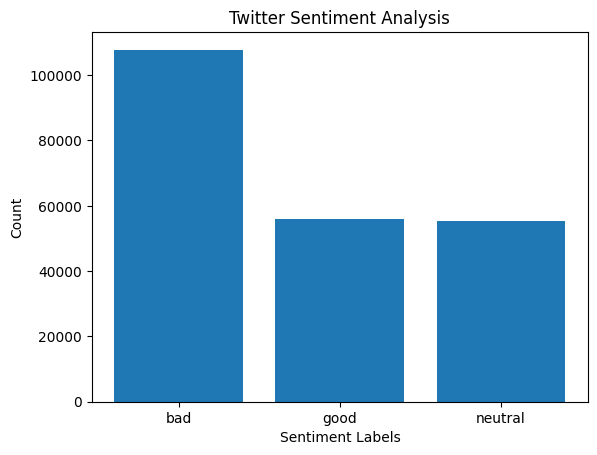

In [ ]:
# Count the occurrences of each label
label_counts = df['labels'].value_counts()

# Create a bar graph
plt.bar(label_counts.index, label_counts.values)

# Add labels and title
plt.xlabel('Sentiment Labels')
plt.ylabel('Count')
plt.title('Twitter Sentiment Analysis')

# Show the plot
plt.show()

In [ ]:
pip install wordcloud


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


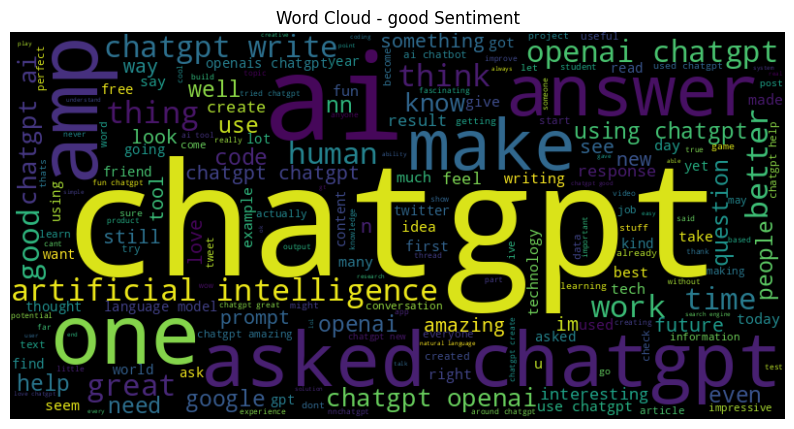

In [ ]:
#to visualize the most used words in the data
# Concatenate the text data for a specific sentiment category
positive_text = " ".join(df[df['labels'] == 'good']['tweets'])

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(positive_text)

# Plot the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - good Sentiment')
plt.show()


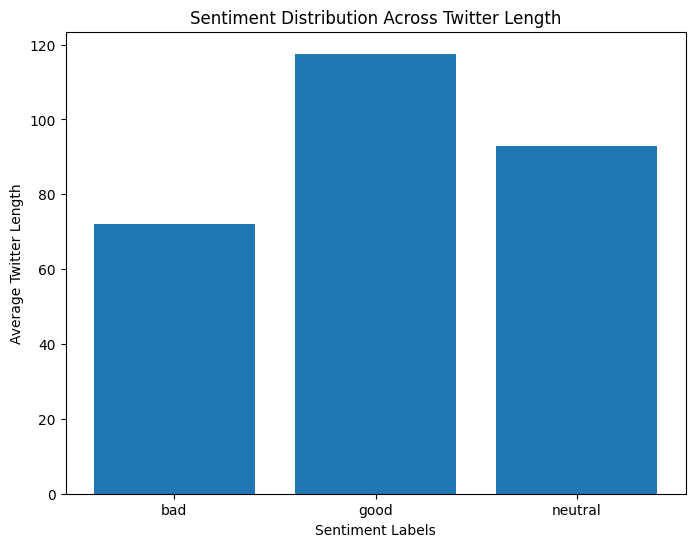

In [ ]:
# Calculate the length of each text
df['tweets_length'] = df['tweets'].str.len()

# Group texts by sentiment labels and calculate the average text length
sentiment_lengths = df.groupby('labels')['tweets_length'].mean()

# Plot the distribution of sentiment labels across text length
plt.figure(figsize=(8, 6))
plt.bar(sentiment_lengths.index, sentiment_lengths.values)
plt.xlabel('Sentiment Labels')
plt.ylabel('Average Twitter Length')
plt.title('Sentiment Distribution Across Twitter Length')
plt.show()


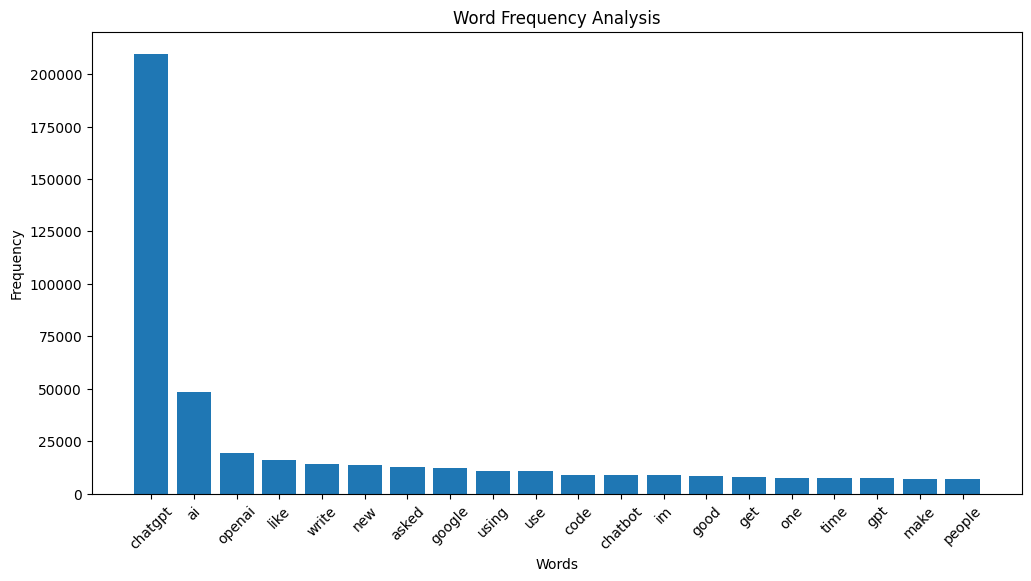

In [ ]:
# Tokenize the text data into individual words
tokens = [word_tokenize(text) for text in df['tweets']]

# Flatten the list of tokens
all_words = [word.lower() for sublist in tokens for word in sublist]

# Calculate the frequency distribution of words
freq_dist = FreqDist(all_words)

# Get the most common words and their frequencies
most_common = freq_dist.most_common(20)

# Create lists of words and frequencies
words = [word[0] for word in most_common]
frequencies = [word[1] for word in most_common]

# Plot the word frequency graph
plt.figure(figsize=(12, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Word Frequency Analysis')
plt.xticks(rotation=45)
plt.show()


## Model Selection and Training:

In [ ]:
# Define X and Y
X = df['tweets']# input data or features
y = df['labels']  # output or target variable

In [ ]:
X_train,X_test,y_train,y_test = train_test_split (X, y, test_size= 0.2, random_state = 42)

In [ ]:
# Print the shape of the training dataset
print("The Shape of X_train:", X_train.shape)

# Print the shape of the test dataset
print("The Shape of X_test:", X_test.shape)

# Print the shape of the training labels
print("The Shape of y_train:", y_train.shape)

# Print the shape of the test labels
print("The Shape of y_test:", y_test.shape)

The Shape of X_train: (175435,)
The Shape of X_test: (43859,)
The Shape of y_train: (175435,)
The Shape of y_test: (43859,)


In [ ]:
# Initialize the TfidfVectorizer with appropriate parameters
vectorizer = TfidfVectorizer(max_features=10000, max_df=0.8, min_df=0.001)

# Fit and transform the training data (tweets) into TF-IDF features
X_train_features = vectorizer.fit_transform(X_train)

# Transform the test data (tweets) using the learned vocabulary from training data
X_test_features = vectorizer.transform(X_test)

In [ ]:
# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Print the numerical labels
print(y_train_encoded)
print(y_test_encoded)

[1 2 2 ... 2 1 0]
[0 0 0 ... 2 0 1]


In [ ]:
# Print the numerical representation of tweets
print(X_train_features.toarray())

# Print the numerical representation of labels
print(y_train_encoded)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
[1 2 2 ... 2 1 0]


In [ ]:
# Create a dictionary to map numerical labels to categories
label_mapping = {0: "neutral", 1: "good", 2: "bad"}

# Print the mapping
print(label_mapping)


{0: 'neutral', 1: 'good', 2: 'bad'}


## Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Create a Logistic Regression classifier
logreg_classifier = LogisticRegression(max_iter=1000)

# Train the model
logreg_classifier.fit(X_train_features, y_train_encoded)

LogisticRegression(max_iter=1000)

Accuracy: 0.7908297042796233
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.93      0.88     21474
           1       0.78      0.74      0.76     11204
           2       0.69      0.58      0.63     11181

    accuracy                           0.79     43859
   macro avg       0.77      0.75      0.76     43859
weighted avg       0.78      0.79      0.79     43859



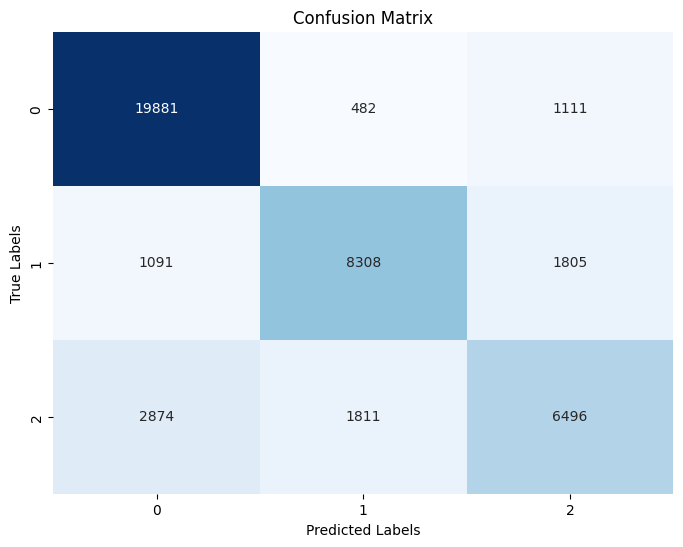

In [ ]:
# Predict on the test data
y_pred = logreg_classifier.predict(X_test_features)

# Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", accuracy)
# Generate classification report
classification_rep = classification_report(y_test_encoded, y_pred)
print("Classification Report:\n", classification_rep)

# Generate confusion matrix
confusion_mat = confusion_matrix(y_test_encoded, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

## Naivy Bays

In [ ]:
# Create a Multinomial Naive Bayes Classifier
nb_classifier = MultinomialNB()
# Train the model
nb_classifier.fit(X_train_features, y_train_encoded)

MultinomialNB()

Accuracy: 0.6817528899427712
Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.96      0.80     21474
           1       0.72      0.58      0.64     11204
           2       0.56      0.26      0.35     11181

    accuracy                           0.68     43859
   macro avg       0.66      0.60      0.60     43859
weighted avg       0.67      0.68      0.65     43859



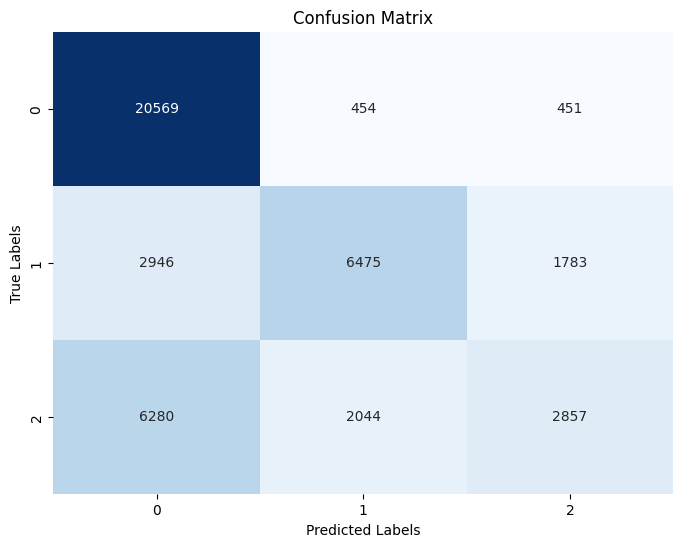

In [ ]:
# Predict on the test data
y_pred = nb_classifier.predict(X_test_features)
#  Calculate accuracy
accuracy = accuracy_score(y_test_encoded, y_pred)
print("Accuracy:", accuracy)
# Generate classification report
classification_rep = classification_report(y_test_encoded, y_pred)
print("Classification Report:\n", classification_rep)

# Generate confusion matrix
confusion_mat = confusion_matrix(y_test_encoded, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_mat, annot=True, cmap='Blues', fmt='d', cbar=False)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

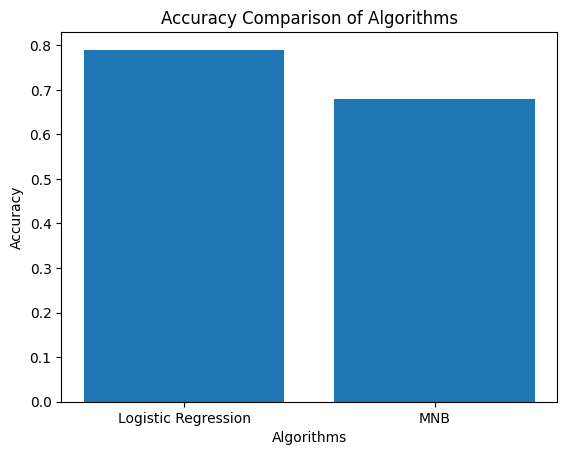

In [ ]:
# Create a figure and axes
fig, ax = plt.subplots()

# Define the labels for the x-axis (Algorithms)
langs = ['Logistic Regression', 'MNB']

# Define the values for the y-axis (Accuracy)
students = [0.79, 0.68]

# Create a bar plot
ax.bar(langs, students)

# Set the x-axis label
plt.xlabel('Algorithms')

# Set the y-axis label
plt.ylabel('Accuracy')

# Set the title of the plot
plt.title('Accuracy Comparison of Algorithms')

# Display the plot
plt.show()


##Thank You